In [1]:
# import tensorflow as tf; print(tf.__version__)

/Users/yaonie/opt/anaconda3/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.2) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


2.0.0


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [17]:
data_dir = "../data/"
# load csv files to numpy arrays
def load_data(data_dir, train_row):
    train = pd.read_csv(data_dir + "train.csv")
    print(train.shape)
    print(train.head())
#     print(train.shape)
#     print(train.head())
#     print(train[0:])
    X_train = train.values[0:train_row,1:] # 取下标为1-784的列（pixel0 - pixel783）
    y_train = train.values[0:train_row,0] # 取下标为0的列 (label)
    
    
    Pred_test = pd.read_csv(data_dir + "test.csv").values  # 解释 value
    print(Pred_test.shape)
    print(pd.read_csv(data_dir + "test.csv").head())
    return X_train, y_train, Pred_test[:, 1:]

train_row = 60000 # 如果想取全部数据，设置为最大值 42000
Origin_X_train, Origin_y_train, Origin_X_test = load_data(data_dir, train_row)

(60000, 785)
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      0       0       0       0       0       0       0       0       0   
1      1       0       0       0       0       0       0       0       0   
2      2       0       0       0       0       0       0       0       0   
3      3       0       0       0       0       0       0       0       0   
4      4       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0      

3


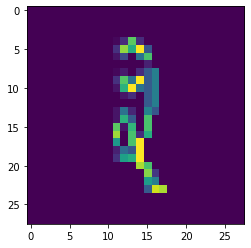

In [9]:
row = 3
# 展示第i个图
# print (X_train[row].reshape((28, 28)))

print (Origin_y_train[row])

plt.imshow(Origin_X_train[row].reshape((28, 28)))
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_vali, y_train, y_vali = train_test_split(Origin_X_train,
                                                   Origin_y_train,
                                                   test_size = 0.2,
                                                   random_state = 0)

print(X_train.shape, X_vali.shape, y_train.shape, y_vali.shape)

(4000, 784) (1000, 784) (4000,) (1000,)


In [11]:
import time
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

ans_k = 0

k_range = range(1, 8)
scores = []

# 这个地方通过枚举所有的k值来取找到最好的k值预测数据
for k in k_range:
    print("k = " + str(k) + " begin ")
    start = time.time()
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_vali)
    accuracy = accuracy_score(y_vali,y_pred)
    scores.append(accuracy)
    end = time.time()
    print(classification_report(y_vali, y_pred))  
    print(confusion_matrix(y_vali, y_pred))  
    
    print("Complete time: " + str(end-start) + " Secs.")

k = 1 begin 
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       103
           1       0.93      0.99      0.96       108
           2       0.99      0.96      0.97       113
           3       0.97      0.98      0.97        95
           4       1.00      0.99      1.00       108
           5       0.99      1.00      0.99        95
           6       0.95      0.96      0.95        92
           7       0.98      0.97      0.97        86
           8       1.00      0.98      0.99        96
           9       0.98      0.98      0.98       104

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000

[[ 95   7   1   0   0   0   0   0   0   0]
 [  1 107   0   0   0   0   0   0   0   0]
 [  3   0 108   1   0   0   1   0   0   0]
 [  0   0   0  93   0   0   1   1   0   0]
 [  0   0   0   0 107   1   0   0   0   0]
 [  0   0   0

[0.972, 0.972, 0.978, 0.975, 0.971, 0.971, 0.969]


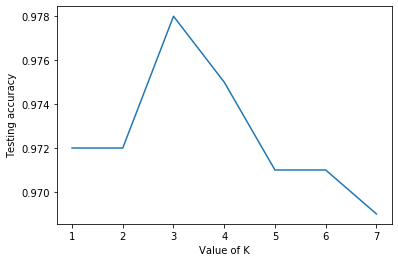

In [12]:
print (scores)
plt.plot(k_range,scores)
plt.xlabel('Value of K')
plt.ylabel('Testing accuracy')
plt.show()

In [18]:
k = 3

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(Origin_X_train,Origin_y_train)
y_pred = knn.predict(Origin_X_test)

5


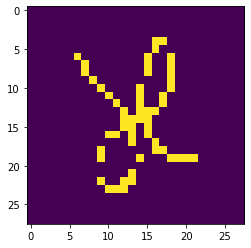

In [22]:
print (y_pred[100])
plt.imshow(Origin_X_test[100].reshape((28, 28)))
plt.show()

In [19]:
print(len(y_pred))

# save submission to csv
pd.DataFrame({"ImageId": list(range(1,len(y_pred)+1)),"Label": y_pred}).to_csv('Digit_Recogniser_Result.csv', index=False,header=True)

5000
